In [2]:
import pandas as pd

raw = pd.read_json("https://raw.githubusercontent.com/Biuni/PokemonGO-Pokedex/master/pokedex.json")
df = pd.json_normalize(raw["pokemon"])

#handling all the null values
df['candy_count'] = df['candy_count'].fillna(0)

df['multipliers'] = df['multipliers'].fillna('[0]')

df['next_evolution'] = df['next_evolution'].fillna("[{'num': 'unknown', 'name': 'unknown'}]")

df['prev_evolution'] = df['prev_evolution'].fillna("[{'num': 'unknown', 'name': 'unknown'}]")

#changing columns data type according the ask
columns_to_int = ['num', 'candy_count']
df[columns_to_int] = df[columns_to_int].astype('int') # changing data type to int


df = df.rename(columns={'spawn_time':'minutes: seconds'})# renaming the spawn_time column as asked

df['height'] = df['height'].str.replace(' m', '')# stripping m
df['weight'] = df['weight'].str.replace(' kg', '')# stripping kg
columns_to_float = ['height','weight']
df[columns_to_float]= df[columns_to_float].astype('float')# changing data type to float

df['egg']= df['egg'].replace(to_replace='Not in Eggs',value = '0') #handling the values
df['egg'] = df['egg'].str.replace(' km', '') #stripping km
df['egg'] = df['egg'].str.replace('Omanyte Candy', '0') #changing 'Omanyte Candy' to 0 so it won't throw error while changing data type
df['egg']= df['egg'].astype('float')# changing data type to float

df['spawn_chance'] = df['spawn_chance'] * 100 #converting spawn chance values to percentage

df['avg_spawns'] = df['avg_spawns'] / 10.000 #average spawns in 10.000 times
df['avg_spawns'] = df['avg_spawns'].astype('int')#coverting data type to int


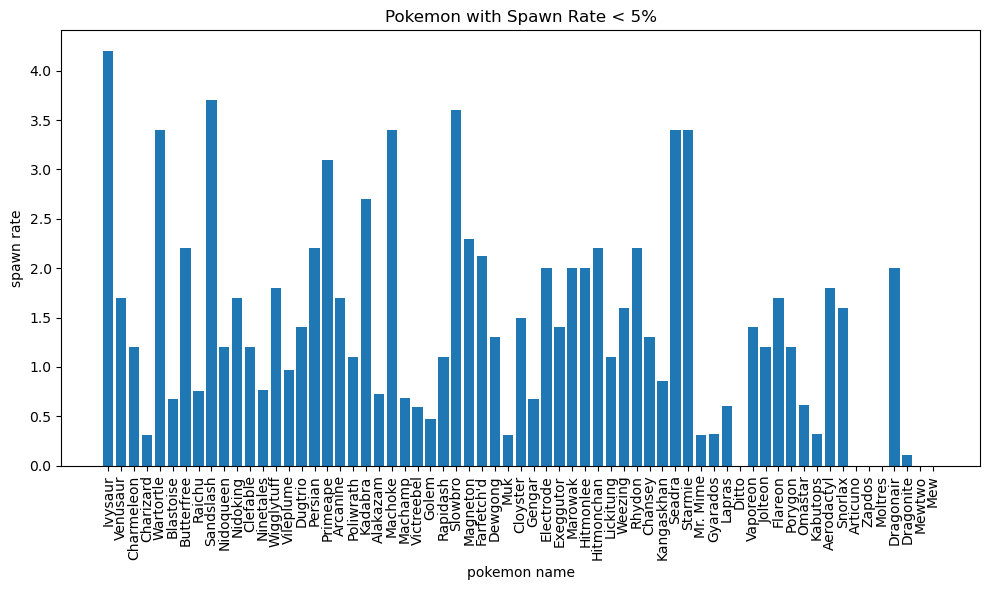

In [3]:
# Getting all Pokemons whose spawn rate is less than 5% 
import matplotlib.pyplot as plt

less_than_5 = df[df['spawn_chance']<5]

plt.figure(figsize=(10, 6))  # Setting the figure size

# Plotting bar chart for visualisation of spawn rate of Pokemon
plt.bar(less_than_5['name'], less_than_5['spawn_chance'])
plt.xlabel('pokemon name')
plt.ylabel('spawn rate')
plt.title('Pokemon with Spawn Rate < 5%')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show() 

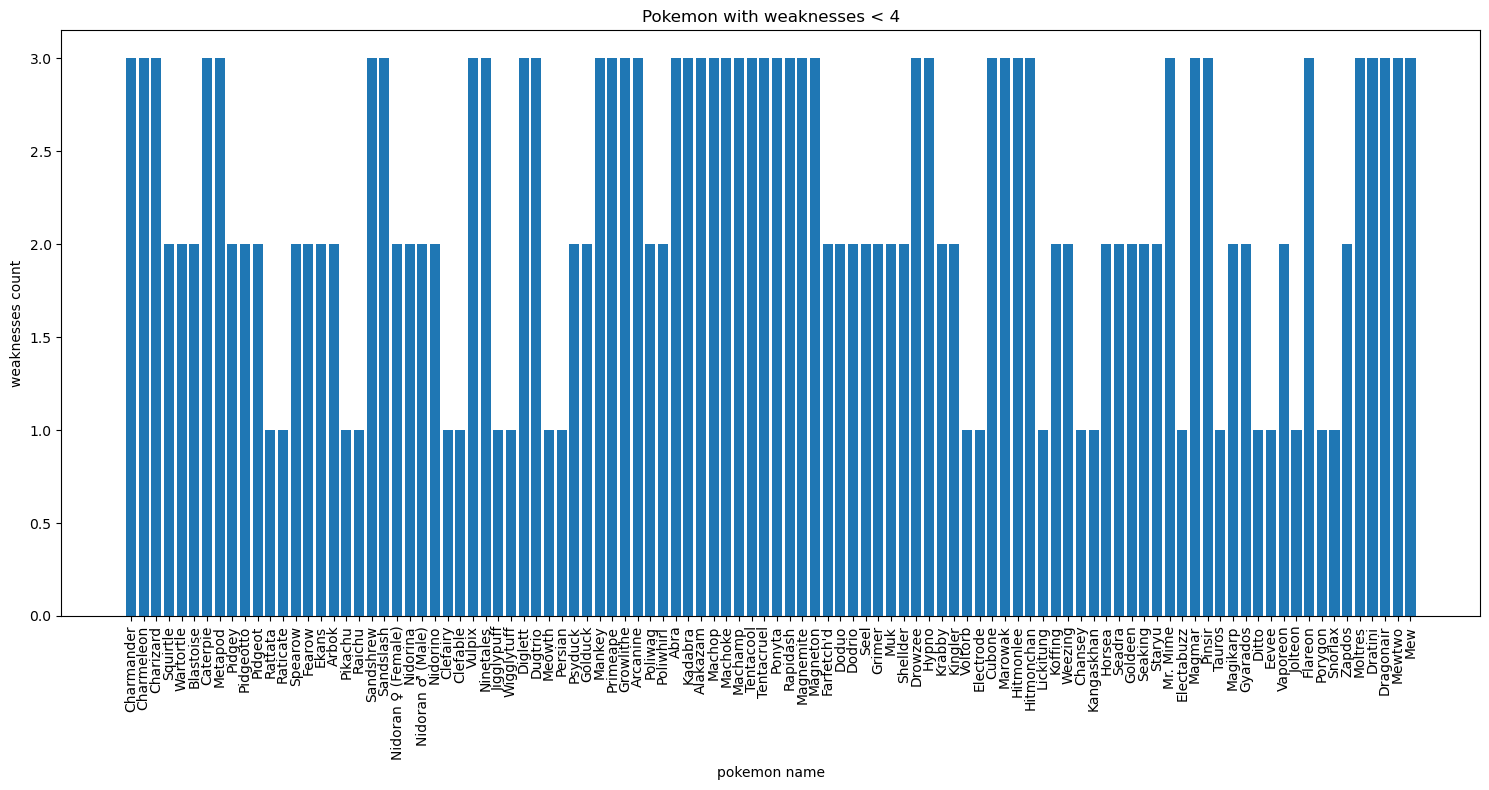

In [4]:
#Getting all Pokemons that have less than 4 weaknesses 

less_than_4 = df[df['weaknesses'].str.len()<4]

#plotting chart
plt.figure(figsize=(15, 8))  # Set the figure size

# Plotting a bar chart for visualisation of spawn rate of Pokemon
plt.bar(less_than_4['name'], less_than_4['weaknesses'].str.len())
plt.xlabel('pokemon name')
plt.ylabel('weaknesses count')
plt.title('Pokemon with weaknesses < 4')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

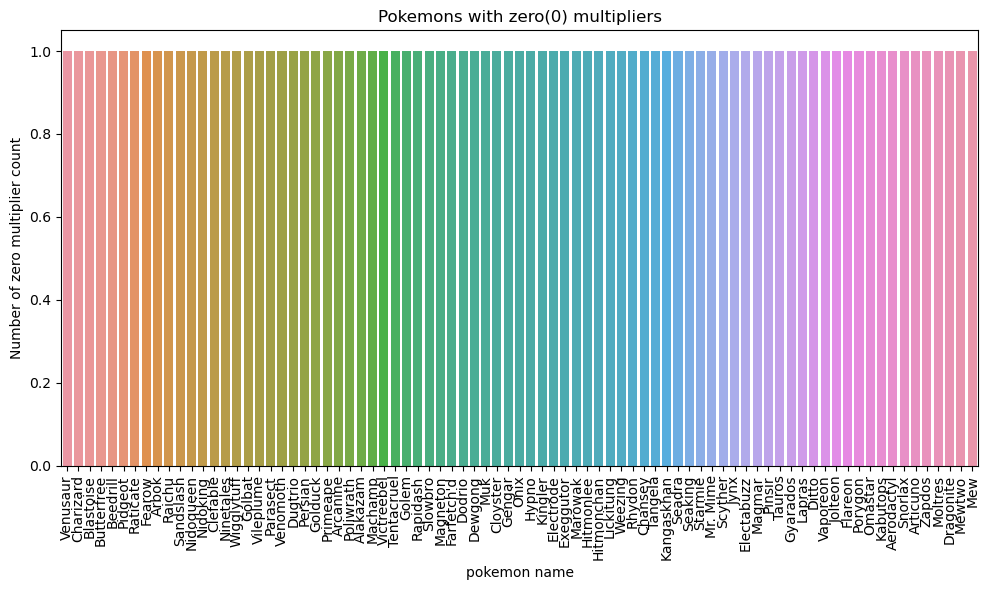

In [5]:
#Get all Pokemons that have no multipliers at all 
import seaborn as sns

no_multipliers = df[df['multipliers'].apply(lambda x: '[0]' in x)]


plt.figure(figsize=(10, 6))

# plotting a count plot for visualisation
sns.countplot(data=no_multipliers, x='name')
plt.xlabel('pokemon name')
plt.ylabel('Number of zero multiplier count')
plt.title('Pokemons with zero(0) multipliers')
plt.xticks(rotation=90) 

plt.tight_layout()
plt.show() 

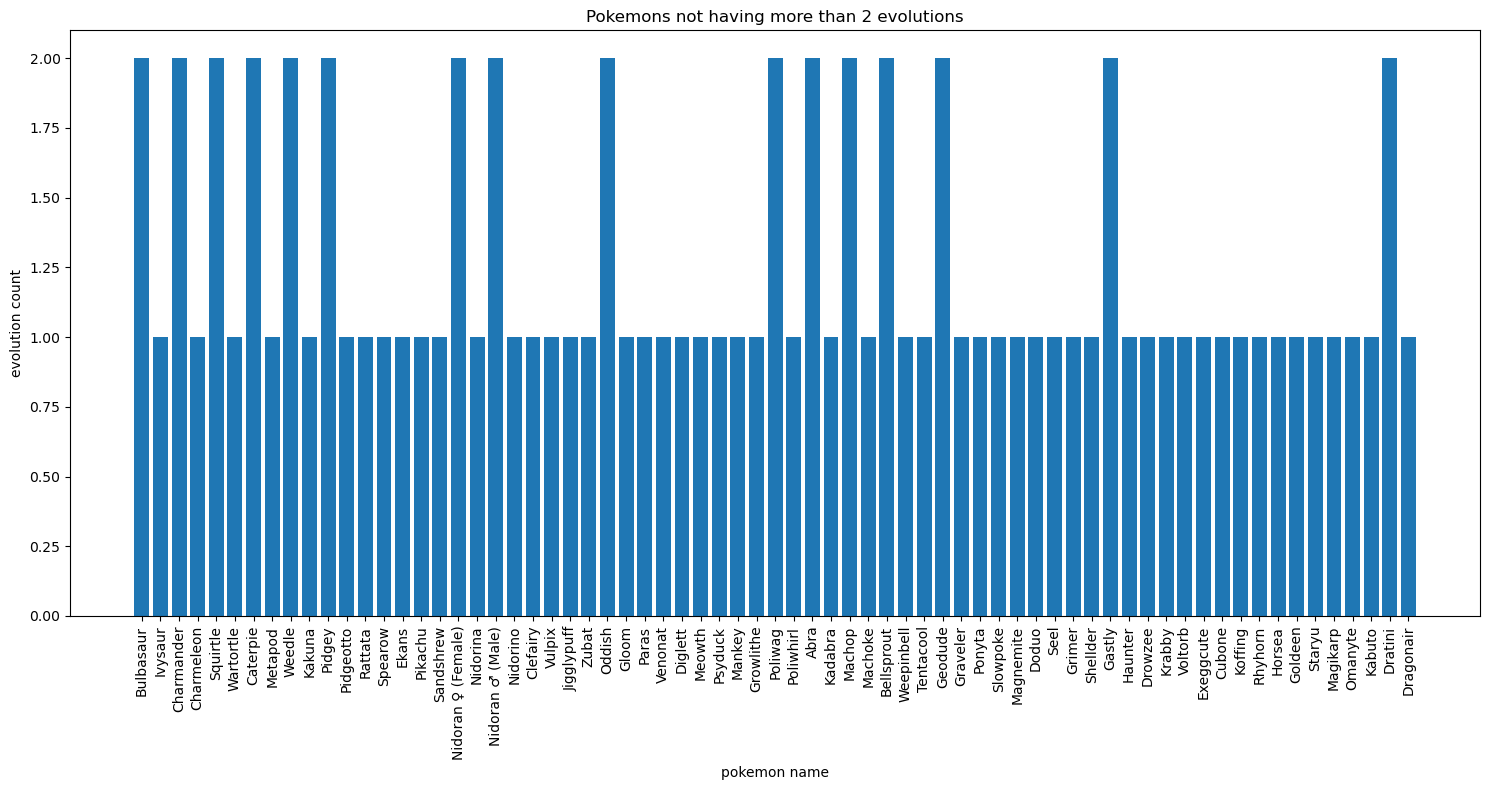

In [6]:
#Getting all Pokemons that do not have more than 2 evolutions

Filter = df[df['next_evolution'].apply(lambda x: len(x) <= 2 )]

plt.figure(figsize=(15, 8))  

# Plotting a bar chart for visualisation of spawn rate of Pokemon
plt.bar(Filter['name'], Filter['next_evolution'].str.len())
plt.xlabel('pokemon name')
plt.ylabel('evolution count')
plt.title('Pokemons not having more than 2 evolutions')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show() 

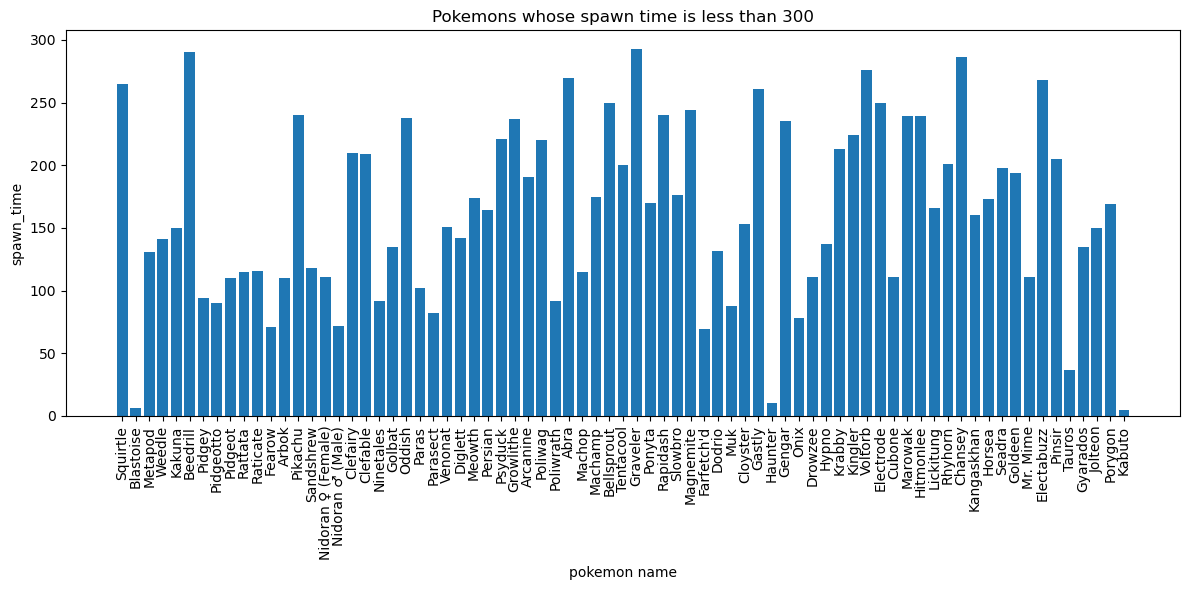

In [7]:
#Getting all Pokemons whose spawn time is less than 300 seconds

# creating temporary column named seconds
# splitting minutes:seconds and multiplying minutes with 60 and adding seconds
df['seconds'] = df['minutes: seconds'].apply(lambda x: int(x.split(':')[0]) * 60 + int(x.split(':')[1]) if x != 'N/A' else None)

# filtering the data less than 300
Filter = df[df['seconds'] < 300]

plt.figure(figsize=(12, 6))  

# Plotting a bar chart for visualisation of spawn rate of Pokemon
plt.bar(Filter['name'], Filter['seconds'])
plt.xlabel('pokemon name')
plt.ylabel('spawn_time')
plt.title('Pokemons whose spawn time is less than 300')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show() 

# Removing the newly formed seconds column
df = df.drop('seconds', axis=1)

In [8]:
#Getting all Pokemons who have more than two types of capabilities

Filter = df[df['type'].apply(lambda x: len(x) > 2)]

Filter.head()

# there is no data where pokemons have more than two types of capabilities so it's not plotable

,id,num,name,img,type,height,weight,candy,candy_count,egg,spawn_chance,avg_spawns,minutes: seconds,multipliers,weaknesses,next_evolution,prev_evolution
